<a href="https://colab.research.google.com/github/zenithstar1/AI-Driven-Crop-Disease-Prediction-and-Management-System/blob/main/sihh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/archive (2) (1).zip'
extract_to_dir = '/content/drive/MyDrive/extracted_data_v2/'

os.makedirs(extract_to_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)


In [ ]:
import os
extracted_files = os.listdir(extract_to_dir)
print(extracted_files)


['AppleScabFDs']


In [ ]:
import os
apple_scab_dir = '/content/drive/MyDrive/extracted_data_v2/AppleScabFDs'
print(os.listdir(apple_scab_dir))


['Healthy', 'Scab']


In [ ]:
import tensorflow as tf


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    apple_scab_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='binary',
    validation_split=0.2,
    subset='training',
    seed=123  # For reproducibility
)


validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    apple_scab_dir,
    image_size=(256, 256),  # Adjust as needed
    batch_size=32,  # Adjust batch size as needed
    label_mode='binary',  # Use 'categorical' for multi-class
    validation_split=0.2,  # Use 20% of the data for validation
    subset='validation',  # Specify 'validation' for validation data
    seed=123  # For reproducibility
)


Found 297 files belonging to 2 classes.
Using 238 files for training.
Found 297 files belonging to 2 classes.
Using 59 files for validation.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def show_data(path, label):

    fig, axs = plt.subplots(3, 4, figsize=(16, 12), constrained_layout=True)


    if label == 'healthy':
        image_dir = os.path.join(path, 'Healthy')
    elif label == 'scab':
        image_dir = os.path.join(path, 'Scab')
    else:
        raise ValueError("Label should be either 'healthy' or 'scab'")

    files = os.listdir(image_dir)
    files.sort()

    if label == 'healthy':
        aug_files = files[4:82]
        files = list(set(files) - set(aug_files)) + list(set(aug_files) - set(files))
        files.sort()
        fig.suptitle('Healthy Apples\n', fontsize=18, fontweight='medium')
        idx = 0
        for i in range(3):
            for j in range(4):
                if j % 2 == 0:
                    img_path = os.path.join(image_dir, files[idx])
                else:
                    img_path = os.path.join(image_dir, aug_files[idx])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (500, 500))

                axs[i][j].imshow(img)
                axs[i][j].set_title(f'{files[idx]}' if j % 2 == 0 else f'{aug_files[idx]}', fontsize=14, fontweight='medium')
                axs[i][j].set_xticks([])
                axs[i][j].set_yticks([])
                axs[i][j].grid(False)
                axs[i][j].axis('off')
                idx += 1

    elif label == 'scab':
        fig.suptitle('Scab Apples\n', fontsize=18, fontweight='medium')
        idx = 0
        for i in range(3):
            for j in range(4):
                img_path = os.path.join(image_dir, files[idx])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (500, 500))

                axs[i][j].imshow(img)
                axs[i][j].set_title(f'{files[idx]}', fontsize=14, fontweight='medium')
                axs[i][j].set_xticks([])
                axs[i][j].set_yticks([])
                axs[i][j].grid(False)
                axs[i][j].axis('off')
                idx += 1


    plt.savefig(f'{label}_apples.png', facecolor='w', transparent=False, bbox_inches='tight', dpi=300)
    plt.show()




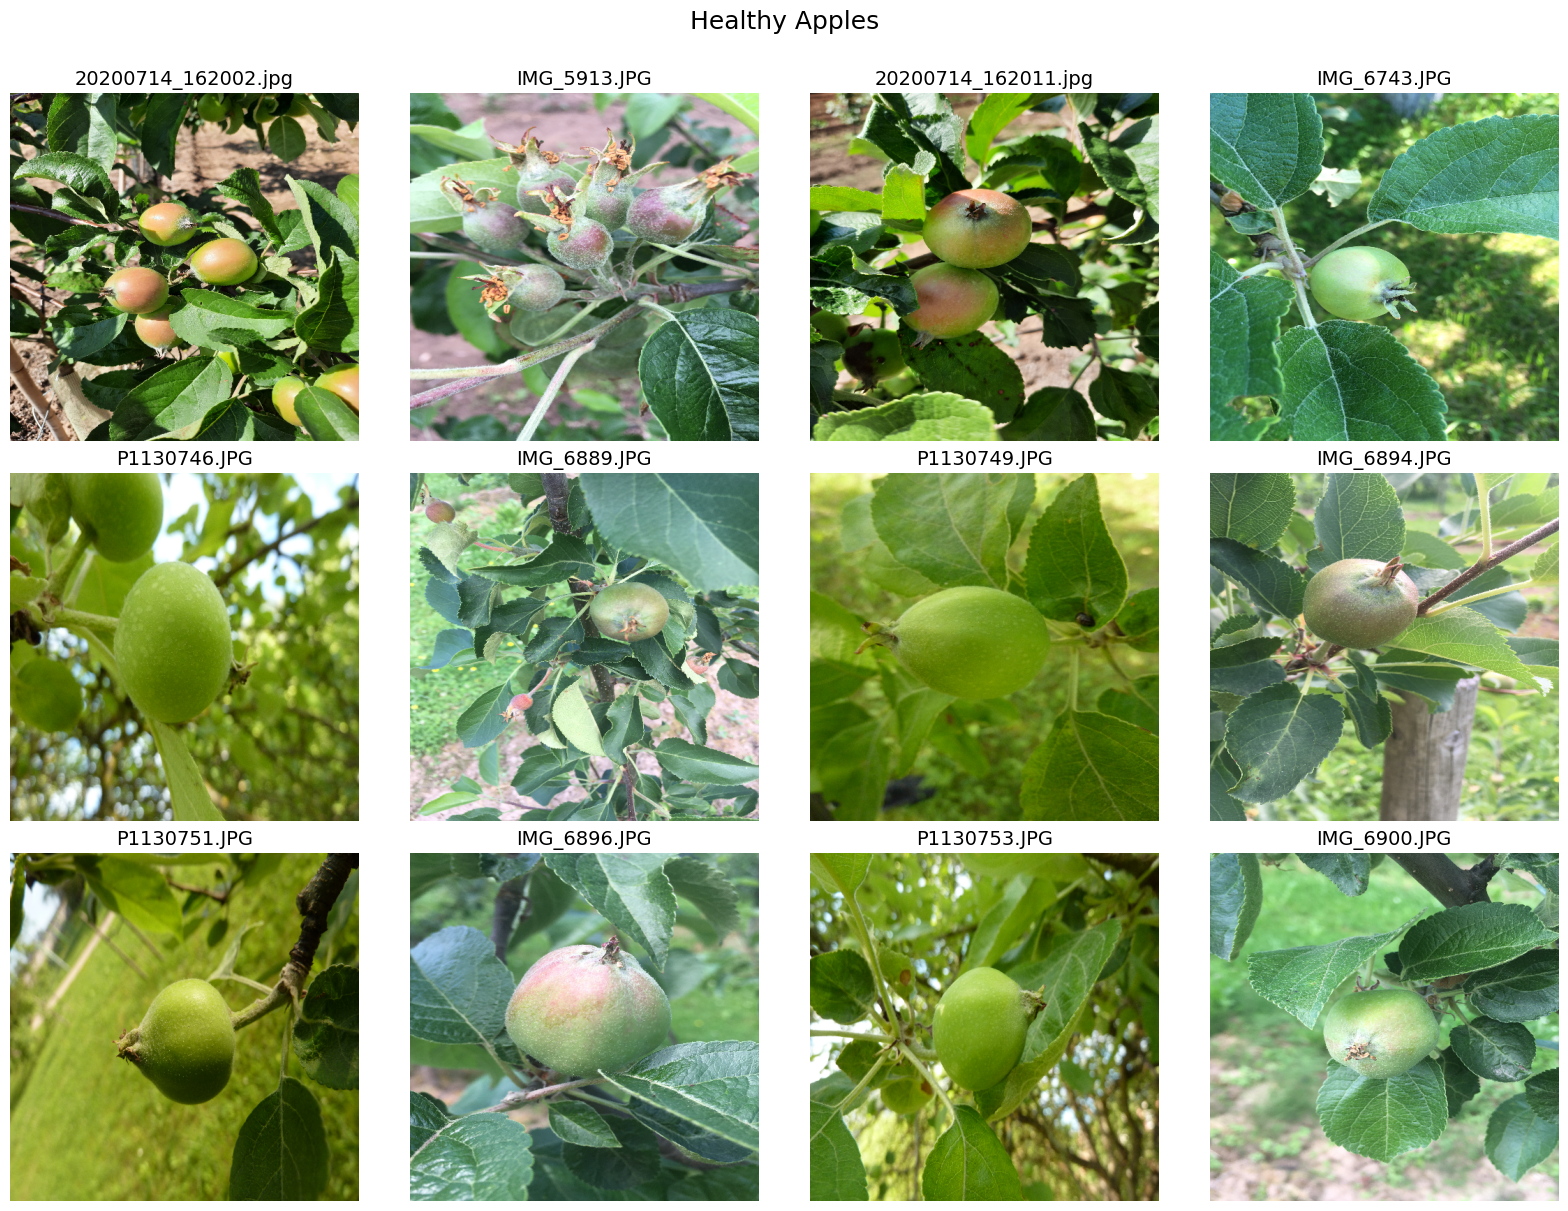

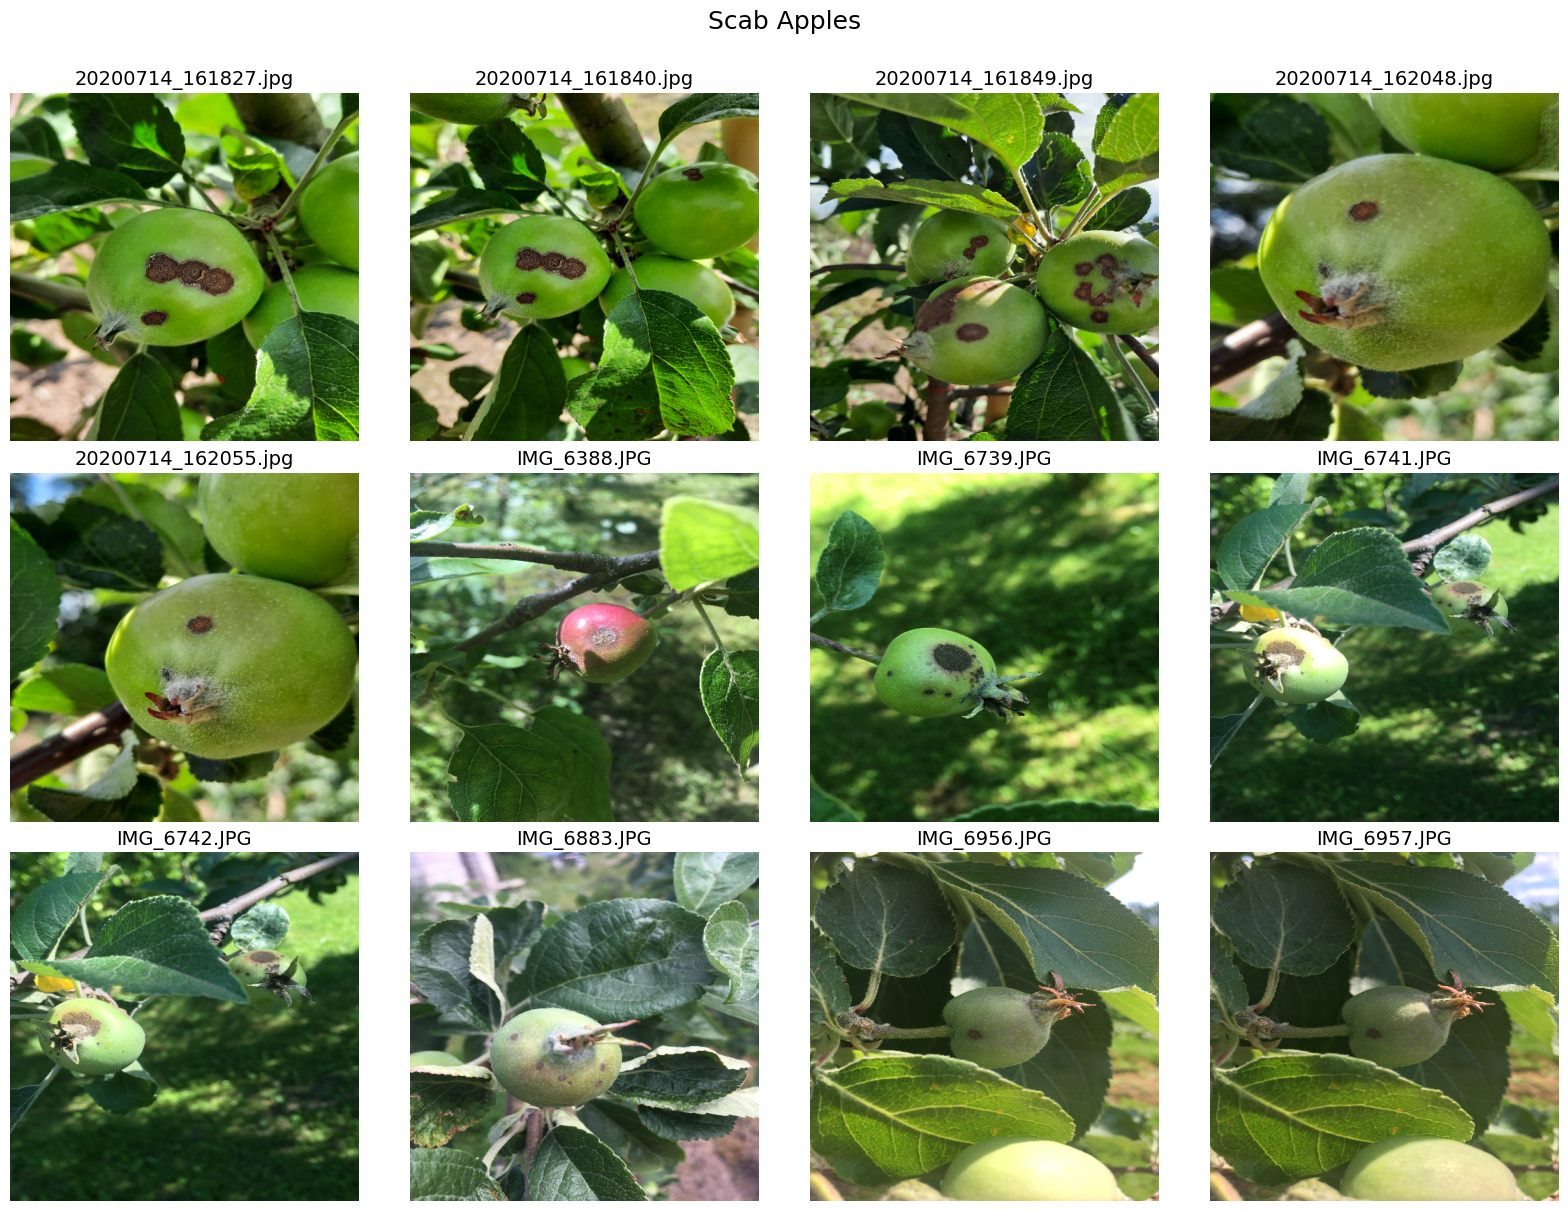

In [ ]:
show_data('/content/drive/MyDrive/extracted_data_v2/AppleScabFDs/', 'healthy')
show_data('/content/drive/MyDrive/extracted_data_v2/AppleScabFDs/', 'scab')


In [ ]:
import os
import shutil
import random


apple_scab_dir = '/content/drive/MyDrive/extracted_data_v2/AppleScabFDs'
train_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/train/'
test_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/test/'

# Function to clear existing directories
def clear_directory(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path, exist_ok=True)

test_size = 0.2
for directory in [train_data_dir, test_data_dir]:
    for category in ['Healthy', 'Scab']:
        clear_directory(os.path.join(directory, category))

def split_and_move_images(src_dir, train_dir, test_dir, test_size=0.2):
    for category in ['Healthy', 'Scab']:
        category_src_dir = os.path.join(src_dir, category)
        files = os.listdir(category_src_dir)

        random.shuffle(files)
        split_index = int(len(files) * (1 - test_size))
        train_files = files[:split_index]
        test_files = files[split_index:]

        for file in train_files:
            shutil.copy(os.path.join(category_src_dir, file), os.path.join(train_dir, category, file))

        for file in test_files:
            shutil.copy(os.path.join(category_src_dir, file), os.path.join(test_dir, category, file))

split_and_move_images(apple_scab_dir, train_data_dir, test_data_dir)
print("Dataset split into training and testing sets successfully.")


Dataset split into training and testing sets successfully.


In [ ]:
import os

def count_images_in_category(dir_path, categories):
    """Count the number of images for each category within the given directory."""
    counts = {category: 0 for category in categories}

    for category in categories:
        category_dir = os.path.join(dir_path, category)
        if os.path.isdir(category_dir):
            counts[category] = len(os.listdir(category_dir))
    return counts

apple_scab_dir = '/content/drive/MyDrive/extracted_data_v2/AppleScabFDs'
train_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/train/'
test_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/test/'


categories = ['Healthy', 'Scab']


original_counts = count_images_in_category(apple_scab_dir, categories)


train_counts = count_images_in_category(train_data_dir, categories)
test_counts = count_images_in_category(test_data_dir, categories)


total_healthy = original_counts['Healthy']
total_scab = original_counts['Scab']
train_healthy = train_counts['Healthy']
train_scab = train_counts['Scab']
test_healthy = test_counts['Healthy']
test_scab = test_counts['Scab']


print("Original dataset:")
print(f"  Total Healthy Images: {total_healthy}")
print(f"  Total Scab Images: {total_scab}")

print("\nTraining dataset:")
print(f"  Healthy Images: {train_healthy}")
print(f"  Scab Images: {train_scab}")

print("\nTesting dataset:")
print(f"  Healthy Images: {test_healthy}")
print(f"  Scab Images: {test_scab}")


Original dataset:
  Total Healthy Images: 90
  Total Scab Images: 207

Training dataset:
  Healthy Images: 72
  Scab Images: 165

Testing dataset:
  Healthy Images: 18
  Scab Images: 42


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/train/'
test_data_dir = '/content/drive/MyDrive/Datasets/Augmented_AppleScabFDs/test/'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255) #test data not augumented to ensure fair evaluation of the unseen data


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 237 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False #freezing the layers so as to not change the layers of the vgg16model, only the upper layers which we have added so we are focused on its training only.


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3
)
#accuracy is decreasing

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 159s 18s/step - accuracy: 0.6959 - loss: 0.5642
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6875 - loss: 0.5928 
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 166s 22s/step - accuracy: 0.6661 - loss: 0.5850


In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.6562 - loss: 0.5759
Test loss: 0.5759
Test accuracy: 0.6562


In [ ]:
import numpy as np
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.classes


for i in range(len(y_true)):
    true_label = 'Healthy' if y_true[i] == 0 else 'Scab'
    pred_label = 'Healthy' if y_pred[i] == 0 else 'Scab'
    print(f"Image {i+1}: True Label: {true_label}, Predicted Label: {pred_label}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 18s/step
Image 1: True Label: Healthy, Predicted Label: Scab
Image 2: True Label: Healthy, Predicted Label: Scab
Image 3: True Label: Healthy, Predicted Label: Scab
Image 4: True Label: Healthy, Predicted Label: Scab
Image 5: True Label: Healthy, Predicted Label: Scab
Image 6: True Label: Healthy, Predicted Label: Scab
Image 7: True Label: Healthy, Predicted Label: Scab
Image 8: True Label: Healthy, Predicted Label: Scab
Image 9: True Label: Healthy, Predicted Label: Scab
Image 10: True Label: Healthy, Predicted Label: Scab
Image 11: True Label: Healthy, Predicted Label: Scab
Image 12: True Label: Healthy, Predicted Label: Scab
Image 13: True Label: Healthy, Predicted Label: Scab
Image 14: True Label: Healthy, Predicted Label: Scab
Image 15: True Label: Healthy, Predicted Label: Scab
Image 16: True Label: Healthy, Predicted Label: Scab
Image 17: True Label: Healthy, Predicted Label: Scab
Image 18: True Label: Healthy, Predicted Label: Scab
Image 19: True La

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 157s 19s/step - accuracy: 0.7108 - loss: 0.5128
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7812 - loss: 0.4933 
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 182s 19s/step - accuracy: 0.7053 - loss: 0.5427
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7812 - loss: 0.4973 
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 168s 20s/step - accuracy: 0.7327 - loss: 0.4948


In [ ]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (256, 256))
    image = image / 255.0  # normlizing
    return image, label


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize images
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001 #increased the learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

img_width, img_height = 150, 150
batch_size = 16  # batch size changed from 32 to 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=1e-6
)



history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 237 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.5779 - loss: 2.0050 - val_accuracy: 0.5417 - val_loss: 0.9042 - learning_rate: 0.0010
Epoch 2/5
 1/14 ━━━━━━━━━━━━━━━━━━━━ 1:09 5s/step - accuracy: 0.6875 - loss: 1.2629

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.6875 - loss: 1.2629 - val_accuracy: 0.6667 - val_loss: 0.6646 - learning_rate: 0.0010
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step - accuracy: 0.6844 - loss: 1.0871 - val_accuracy: 0.8958 - val_loss: 0.3128 - learning_rate: 0.0010
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.6250 - loss: 1.1124 - val_accuracy: 0.7500 - val_loss: 0.4003 - learning_rate: 0.0010
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step - accuracy: 0.6899 - loss: 0.8312 - val_accuracy: 0.7292 - val_loss: 0.5269 - learning_rate: 5.0000e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.8654 - loss: 0.3459
Test Loss: 0.3348
Test Accuracy: 0.8667


In [ ]:
import numpy as np

# Generate predictions for the test set
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Get the true labels
y_true = test_generator.classes

# Compare predictions with true labels
for i in range(len(y_true)):
    print(f"Image {i+1}: True Label: {y_true[i]}, Predicted Label: {y_pred[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step
Image 1: True Label: 0, Predicted Label: 1
Image 2: True Label: 0, Predicted Label: 1
Image 3: True Label: 0, Predicted Label: 1
Image 4: True Label: 0, Predicted Label: 1
Image 5: True Label: 0, Predicted Label: 1
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 1
Image 8: True Label: 0, Predicted Label: 1
Image 9: True Label: 0, Predicted Label: 1
Image 10: True Label: 0, Predicted Label: 1
Image 11: True Label: 0, Predicted Label: 1
Image 12: True Label: 0, Predicted Label: 1
Image 13: True Label: 0, Predicted Label: 1
Image 14: True Label: 0, Predicted Label: 1
Image 15: True Label: 0, Predicted Label: 1
Image 16: True Label: 0, Predicted Label: 1
Image 17: True Label: 0, Predicted Label: 1
Image 18: True Label: 0, Predicted Label: 1
Image 19: True Label: 1, Predicted Label: 1
Image 20: True Label: 1, Predicted Label: 0
Image 21: True Label: 1, Predicted Label: 1
Image 22: True Label: 1, Predicted Label: 1
Imag

In [ ]:

test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


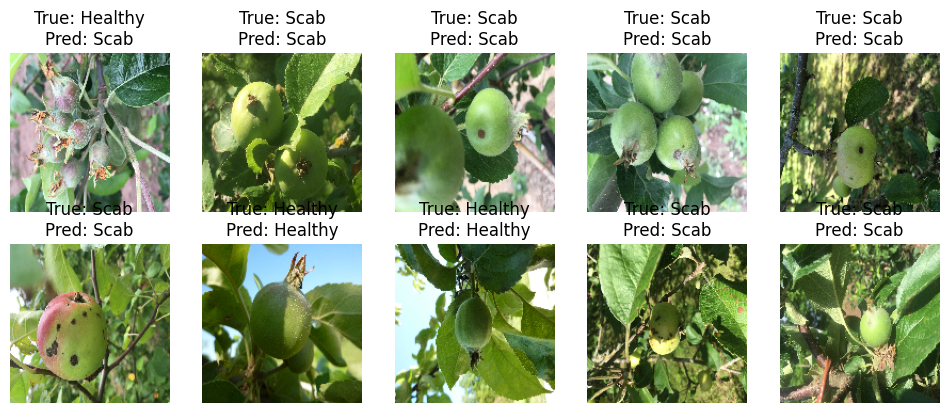

In [ ]:
def plot_images(images, true_labels, predicted_labels, class_labels, num_images=10):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        true_label = class_labels[true_labels[i]]
        predicted_label = class_labels[predicted_labels[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()


class_labels = list(test_generator.class_indices.keys())

plot_images(test_images, true_classes, predicted_classes, class_labels)


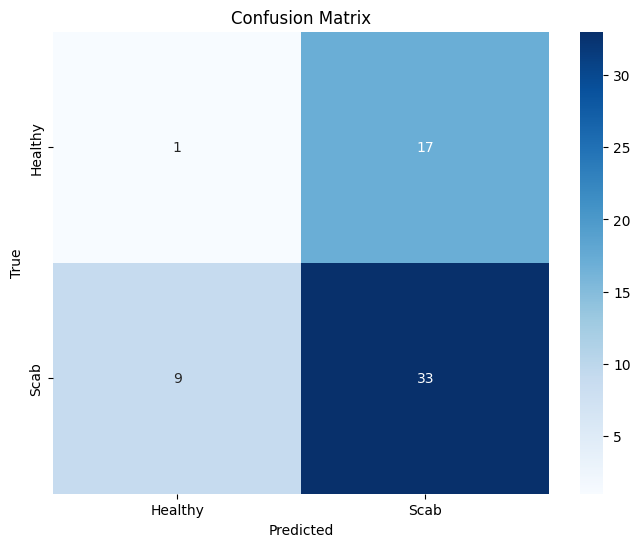

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
